## Step 0: Import necessary packages

In [1]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

from astropy.io import fits

Search PDS4 for BepiColombo flyby image products

In [29]:
response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN") and (pds:Investigation_Area.pds:name eq "BepiColombo") and (pds:Header.pds:parsing_standard_id eq "FITS 3.0") )&start=0&limit=3000')

resp_data = response.json()['data']

print(resp_data)
print('debug')

In [24]:

response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN") )&start=0&limit=3000')

resp_data = response.json()['data']


counter = -1
urls = []
for prod in resp_data:
    try:
        if '.fits' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0] and 'BepiColombo' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0]:
            urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])
    except KeyError:
        continue


print('debug')


https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201812/cam_raw_sc_cam3_image_20181217t105959_24_f__t0010.fits


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

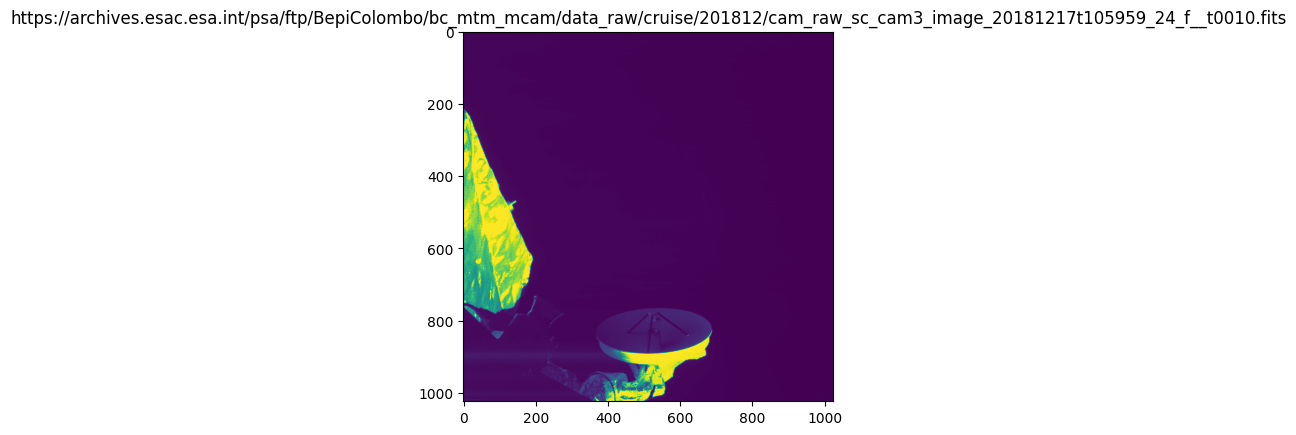

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/flybys/earth_flyby/202004/cam_raw_sc_cam2_image_20200407t125613_60_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/202003/cam_raw_sc_cam3_image_20200330t133102_61_f__t0010.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201902/cam_raw_sc_cam2_image_20190211t063004_62_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201903/cam_raw_sc_cam2_image_20190305t173559_60_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/near_earth_commissioning/201811/cam_raw_sc_cam1_image_20181104t114731_47_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201905/cam_raw_sc_cam3_image_20190517t035514_62_f__t0020.fits


<Figure size 640x480 with 0 Axes>

https://archives.esac.esa.int/psa/ftp/BepiColombo/bc_mtm_mcam/data_raw/cruise/201903/cam_raw_sc_cam2_image_20190301t174025_60_f__t0020.fits


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [3]:

def display_image_from_url(urls):
    fig, ax = plt.subplots()

    for ind,url in enumerate(urls):
        print(url[0])
        response = requests.get(url[0])
        if response.status_code == 200:
            hdu_list = fits.open(BytesIO(response.content))
            data = hdu_list[1].data
            # data = response.content

            ax.imshow(data)
            ax.set_title(url[0])
            plt.pause(.5)
            plt.draw()
            ax.clear()
            hdu_list.close()
        else:
            print(f"Failed to retrieve {url[0]} with status code {response.status_code}")
    plt.ion()

display_image_from_url(urls)

print('debug')

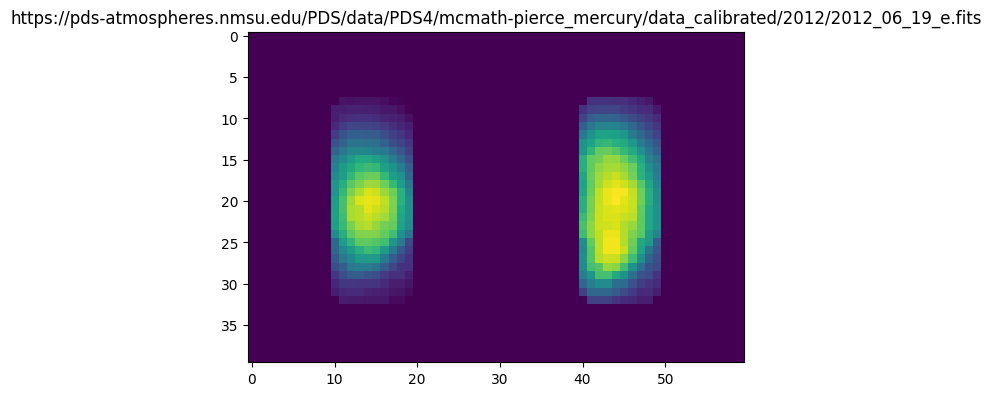

In [22]:
url = resp_data[120]['properties']['ops:Data_File_Info.ops:file_ref'][0]

fig, ax = plt.subplots()
response = requests.get(url)
hdu_list = fits.open(BytesIO(response.content))
data = hdu_list[0].data
# data = response.content

ax.imshow(data)
ax.set_title(url)
plt.draw()
plt.pause(1)
ax.clear()
plt.show()